## Código Exemplo

Link para referência: https://www.kaggle.com/code/medghaithzinine/handsignlanguage-using-cnn#1-DATA-AUGMENTATION

In [3]:
pip install -U matplotlib scipy tensorflowjs -U

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

ValueError: JAX requires ml_dtypes version 0.4.0 or newer; installed version is 0.3.2.

In [5]:
train_dir="./data/Train"
test_dir="./data/Test"

In [6]:
train_datagen=ImageDataGenerator(
    rescale=1./255.,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
#defining the test data 
test_datagen=ImageDataGenerator(
    rescale=1./255.
)
#generating my train data 
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(28,28),
    batch_size=32,
    class_mode='categorical'
)
#generating my validation data 
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical'
)

Found 27455 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28,3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(24, activation='softmax')  # 24 classes: A-Y excluding J and Z
])

2024-06-15 01:41:29.754438: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-15 01:41:29.950042: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [8]:
optimizer=Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
history=model.fit(train_generator,epochs=10,batch_size=32,validation_data=validation_generator,verbose=1)

Epoch 1/10
858/858 [==============================] - 29s 33ms/step - loss: 1.8258 - accuracy: 0.4031 - val_loss: 0.9177 - val_accuracy: 0.6877
Epoch 2/10
858/858 [==============================] - 12s 14ms/step - loss: 0.5762 - accuracy: 0.8004 - val_loss: 0.5763 - val_accuracy: 0.7957
Epoch 3/10
858/858 [==============================] - 12s 14ms/step - loss: 0.2837 - accuracy: 0.9026 - val_loss: 0.3693 - val_accuracy: 0.8887
Epoch 4/10
858/858 [==============================] - 12s 15ms/step - loss: 0.1730 - accuracy: 0.9414 - val_loss: 0.4746 - val_accuracy: 0.8620
Epoch 5/10
858/858 [==============================] - 12s 14ms/step - loss: 0.1172 - accuracy: 0.9606 - val_loss: 0.2667 - val_accuracy: 0.9230
Epoch 6/10
858/858 [==============================] - 12s 14ms/step - loss: 0.0811 - accuracy: 0.9727 - val_loss: 0.2763 - val_accuracy: 0.9361
Epoch 7/10
858/858 [==============================] - 12s 14ms/step - loss: 0.0697 - accuracy: 0.9761 - val_loss: 0.2179 - val_accuracy:

In [10]:
loss, accuracy = model.evaluate(test_generator)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

225/225 [==============================] - 1s 5ms/step - loss: 0.1817 - accuracy: 0.9505
Test loss: 0.1817062497138977
Test accuracy: 0.9505019783973694


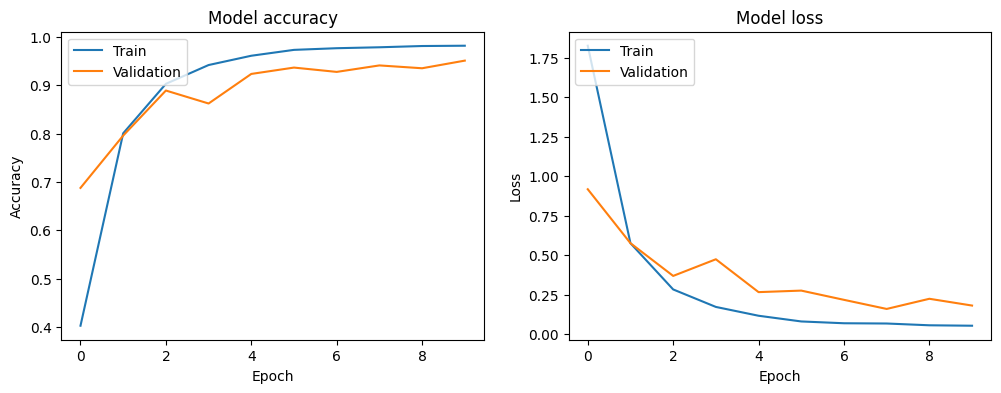

In [11]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [12]:
predict=model.predict(test_generator)
y_hat=np.argmax(predict,axis=1)
print(y_hat)

225/225 [==============================] - 1s 5ms/step
[11 23 17 ... 23 22  0]


In [1]:
from tensorflow.keras.preprocessing import image

# Function to load and preprocess an image
def load_and_preprocess_image(img_path, target_size=(28, 28,3)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image
    return img_array

# Load a single image from the test directory
img_path = './data/Test/E/15_E.jpg'  
img_array = load_and_preprocess_image(img_path)

# Make a prediction
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction, axis=1)

# Map the predicted class index to the corresponding class label
class_labels =list(test_generator.class_indices.keys())
predicted_class_label = class_labels[predicted_class_index[0]]

print(f'Predicted class:{predicted_class_label}')

2024-06-17 08:21:45.074543: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-17 08:21:45.400245: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-17 08:21:48.654213: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


KeyboardInterrupt: 

In [14]:
import tensorflowjs as tfjs